# 2. gyakorlat TensorFlow alapok

A Google által fejlesztett TensorFlow (https://www.tensorflow.org/) keretrendszer az egyik legnépszerűbb mély tanulásos eszköz. 

Alternatívái:

Torch

Caffe

Theano

...


## Számítási gráf

A TensorFlow-ban alapból számítási gráfokat tudunk létrehozni, amelynek csúcsai vagy adatot, vagy műveletet jelentenek.

![comp_grapf](https://cdn-images-1.medium.com/max/800/1*mvhm5_r6LY-eHsin21RJTg.png)

Amennyiben nem adjuk meg egy változóhoz, vagy művelethez, hogy mely graph-hoz tartozik, akkor a default graph-hoz lesz rendelve.


![comp_graph_edge_node](http://www.inf.u-szeged.hu/~papg/bevmely/gyak/kieg/img/edge_node.JPG)

In [ ]:
# Ha probléma lenne a tensorflow 2.0-ás verziójával: (visszaállás colab-on tf 1.14-re)
# Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)



In [3]:
import tensorflow as tf

new_graph = tf.Graph()

with new_graph.as_default():  # use default graph
    new_g_const = tf.constant([1., 2.])

## Session

Minden művelet végrehajtásához szükségünk van egy session-re, tehát a graph-ok lefuttatását session környezetben tehetjük meg.

In [3]:
sess = tf.Session()
a = tf.constant(1) # default graph
b = tf.constant(2)
c = a + b
# instead of sess.run(c)
print(c.eval(session=sess))


3


## Változók

Változókat a tf.Variable() függvénnyel tudunk létrehozni, elletve egyéb beépített függvényekkel. 

In [0]:
tensorflow_var = tf.Variable(1, name="my_variable")

In [0]:
# 4x4 matrix normally distributed mean 0 std 1
normal_var = tf.Variable(tf.truncated_normal([4,4] , mean=0.0, stddev=1.0))

A normal_var változó inicializálásához szükséges egy session létrehozása és egy init függvény.

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(normal_var))

[[ 0.13061184 -0.1363577   1.1302704  -1.5333799 ]
 [-0.39943472  0.10096303 -0.7316799   0.25088245]
 [-0.2680943  -0.50568783 -0.639319    0.48954326]
 [ 0.8547821  -0.48386627 -0.12393714 -0.62292534]]


## Scope

A változóinkat és műveleteinket ún. scope-okba tudjuk rendezni az átláthatóság érdekében

In [0]:
with tf.name_scope("Scope1"):
    with tf.name_scope("Scope_nested"):
        nested_var = tf.multiply(5, 5)


## Feladatok

1. Kódoljunk le egy szimpla neuront/preceptront!
2. Tanítsuk a neuront egy egyszerű adaton!

## 1. Feladat


In [14]:
import numpy as np

def step(x):
    is_greater = tf.greater(x, 0)
    as_float = tf.cast(is_greater, tf.float32)
    doubled = tf.multiply(as_float, 2)
    return tf.subtract(doubled, 1)

Data = np.array([[0.0, 0.0], [1.0,0.0], [0.0,1.0], [1.0,1.0]])
Label = tf.Variable([0.0, 1.0, 1.0, 1.0]) # Logical OR

X = tf.placeholder(tf.float32, shape=[4,2]) # placeholder for data

W = tf.Variable(tf.truncated_normal([2,1] , mean=0.0, stddev=1.0)) # weight vector
B = tf.Variable(0.0, name="bias")
Neuron = tf.add(tf.matmul(X, W),B) # the neuron
Preds = tf.reshape(step(Neuron), [4])
#Preds = tf.round(tf.sigmoid(Neuron)) # activation

loss = tf.reduce_mean(tf.squared_difference(Neuron, Label)) 

accuracy = tf.reduce_sum(tf.cast(tf.equal(Preds,step(Label)), tf.float32))/4
#check accuracy
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

MSE, ACC = sess.run([loss, accuracy], feed_dict={X: Data})
print(MSE, ACC)

0.6292967 0.5


## Lineáris Regresszió TF-ban

![lin_reg](http://www.inf.u-szeged.hu/~papg/bevmely/gyak/kieg/img/learning_algorithm_linear_regression_tf.JPG)

In [2]:
# Import libraries (Numpy, matplotlib)

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create 1000 points following a function y=0.1 * x + 0.4z
# (i.e. # y = W * x + b) with some normal random distribution:

num_points = 1000
vectors_set = []

# Create a few random data points
for i in range(num_points):
    W = 0.1 # W
    b = 0.4 # b
    x1 = np.random.normal(0.0, 1.0)#in: mean, standard deviation
    nd = np.random.normal(0.0, 0.05)#in:mean,standard deviation
    y1 = W * x1 + b
    # Add some impurity with normal distribution -i.e. nd
    y1 = y1 + nd
    # Append them and create a combined vector set:
    vectors_set.append([x1, y1])

In [5]:
# Separate the data point across axises:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

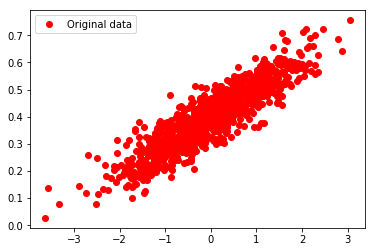

In [6]:
# Plot and show the data points in a 2D space
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()


Gépi tanulási probléma:

y_data = W * _data + b

W = 0;1  <br> b = 0;4



In [7]:
# Declare (initiate) workspace variables for Tensorflow
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [8]:
# mean square error (MSE)
loss = tf.reduce_mean(tf.square(y - y_data))

# Optimalizer - Gradient Descent - Parameter: Learning Rate
optimizer = tf.train.GradientDescentOptimizer(0.6)
train = optimizer.minimize(loss)


In [22]:
#Initialize Tensorflow
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [16]:
#Begin converging
for i in range(6):
    sess.run(train)
    print(i, sess.run(W), sess.run(b), sess.run(loss))

0 [0.09593822] [0.472367] 0.00801027
1 [0.10706484] [0.38432825] 0.0028714952
2 [0.09877604] [0.40268227] 0.0026189347
3 [0.10178299] [0.39845553] 0.0026025246
4 [0.10085524] [0.39950255] 0.0026013388
5 [0.10112424] [0.39923093] 0.0026012505


0 [0.09593822] [0.472367] 0.00801027
1 [0.10706484] [0.38432825] 0.0028714952
2 [0.09877604] [0.40268227] 0.0026189347
3 [0.10178299] [0.39845553] 0.0026025246
4 [0.10085524] [0.39950255] 0.0026013388
5 [0.10112424] [0.39923093] 0.0026012505


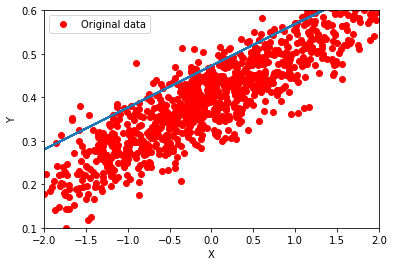

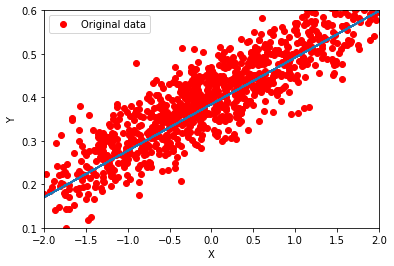

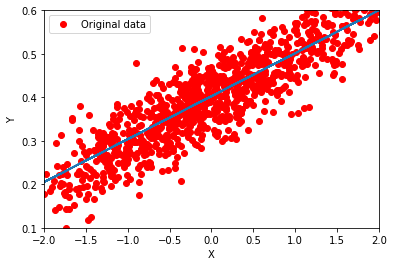

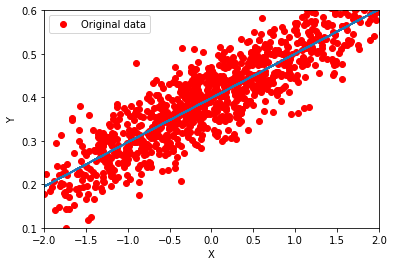

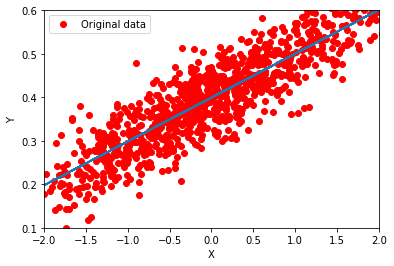

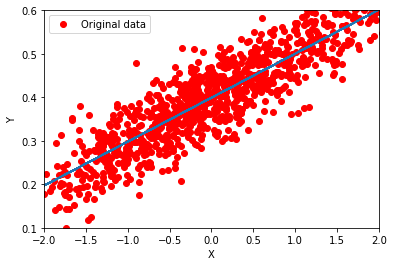

In [23]:
#Plotting
for i in range(6):
    sess.run(train)
    print(i, sess.run(W), sess.run(b), sess.run(loss))
    plt.plot(x_data, y_data, 'ro', label='Original data')
    plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
    plt.xlabel('X')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('Y')
    plt.legend()
    plt.show()


In [ ]:
# Magic command

%load_ext tensorboard
%tensorboard --logdir=logs


## 2. Feladat

In [0]:
# TODO

In [1]:
# Single Neuron Training

features = tf.placeholder(tf.float32, [None, 3])
labels = tf.placeholder(tf.float32, [None,1])

In [2]:
#Random weights
W = tf.Variable([[10.0], [000.0], [0.200]], tf.float32)
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
with tf.Session() as sess:
    sess.run(init)

    predict = tf.nn.sigmoid(tf.matmul(features, W))

    print(sess.run(predict, feed_dict={features:[[0, 1, 1]]}))

    lbls= [[0], [1], [1], [0]]
    print(sess.run(predict,
                 feed_dict={features: [[0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]], labels:lbls}))


    #    error = labels - predict
    error = tf.reduce_mean((labels - predict)**2) 
    # Training
    optimizer = tf.train.GradientDescentOptimizer(10)
    train = optimizer.minimize(error)

    for i in range(100):
        sess.run(train,
        feed_dict={features: [[0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]], labels: lbls})
        training_cost = sess.run(error,
                             feed_dict={features: [[0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]],
                                        labels: lbls})
        classe = sess.run((labels-predict),
                             feed_dict={features: [[0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]],
                                        labels: lbls})
        print('Training cost = ', training_cost, '\nW = ', classe)

    print(sess.run(predict,
                 feed_dict={features: [[0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]]}))


[[0.54983395]]
[[0.54983395]
 [0.9999628 ]
 [0.9999628 ]
 [0.54983395]]
Training cost =  0.0027632895 W =  [[-0.07433982]
 [ 0.00056499]
 [ 0.00014496]
 [-0.07433982]]
Training cost =  0.0022849222 W =  [[-0.06759909]
 [ 0.00062579]
 [ 0.00015259]
 [-0.06759909]]
Training cost =  0.0019483867 W =  [[-0.06242218]
 [ 0.0006814 ]
 [ 0.00015926]
 [-0.06242218]]
Training cost =  0.0016984483 W =  [[-0.05828048]
 [ 0.00073308]
 [ 0.0001651 ]
 [-0.05828048]]
Training cost =  0.0015053699 W =  [[-0.05486729]
 [ 0.00078142]
 [ 0.00017047]
 [-0.05486729]]
Training cost =  0.0013516769 W =  [[-0.05199035]
 [ 0.00082713]
 [ 0.0001753 ]
 [-0.05199035]]
Training cost =  0.0012264098 W =  [[-0.04952196]
 [ 0.00087053]
 [ 0.00017995]
 [-0.04952196]]
Training cost =  0.0011223394 W =  [[-0.04737347]
 [ 0.00091207]
 [ 0.00018412]
 [-0.04737347]]
Training cost =  0.0010344998 W =  [[-0.04548108]
 [ 0.00095195]
 [ 0.00018817]
 [-0.04548108]]
Training cost =  0.0009593689 W =  [[-0.04379759]
 [ 0.00099015]